## Import libraries

In [2]:
import pandas as pd
import numpy as np

## Read the data

In [3]:
data = pd.read_csv("../Data/SMSSpamCollection.csv", sep="\t")
data.head()

,SPAMORNOT,MAIL
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


## Prepare the data

In [4]:
X = data["MAIL"]
Y = data["SPAMORNOT"].values

### Encode the data

In [5]:
from sklearn.preprocessing import LabelEncoder

In [6]:
label_encoder = LabelEncoder()
Y_encoded = label_encoder.fit_transform(Y)

### Clearing the data

In [7]:
from nltk.corpus import stopwords
import nltk # Natural Language Tool Kit
from bs4 import BeautifulSoup
import re

In [8]:
nltk.download("stopwords")
new_list = stopwords.words("english") # Download stopwords in English

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\mehme\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [9]:
stop_words = set(stopwords.words("english"))

In [10]:
def clean_sentence(sentence):
    if sentence != "":
        sentence = BeautifulSoup(sentence, "lxml").get_text()
        sentence = re.sub("[^a-zA-Z]", " ", sentence)
        sentence = sentence.lower()
        words_list = sentence.split()
        words_list_cleaned = [word for word in words_list if word not in stop_words]
        return (" ".join(words_list_cleaned))

### Clear all data

In [11]:
X_all = []

for i in range(len(X)):
    if (i + 1) % 1000 == 0:
        print(f"{i} sentence cleaned and loaded.")
    
    X_all.append(clean_sentence(X[i]))


C:\Users\mehme\AppData\Local\Temp\ipykernel_13680\749091627.py:3: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  sentence = BeautifulSoup(sentence, "lxml").get_text()


999 sentence cleaned and loaded.
1999 sentence cleaned and loaded.
2999 sentence cleaned and loaded.
3999 sentence cleaned and loaded.
4999 sentence cleaned and loaded.


In [12]:
len(X_all), len(X), len(Y)

(5572, 5572, 5572)

In [13]:
X_all[:10]

['go jurong point crazy available bugis n great world la e buffet cine got amore wat',
 'ok lar joking wif u oni',
 'free entry wkly comp win fa cup final tkts st may text fa receive entry question std txt rate c apply',
 'u dun say early hor u c already say',
 'nah think goes usf lives around though',
 'freemsg hey darling week word back like fun still tb ok xxx std chgs send rcv',
 'even brother like speak treat like aids patent',
 'per request melle melle oru minnaminunginte nurungu vettam set callertune callers press copy friends callertune',
 'winner valued network customer selected receivea prize reward claim call claim code kl valid hours',
 'mobile months u r entitled update latest colour mobiles camera free call mobile update co free',
 'gonna home soon want talk stuff anymore tonight k cried enough today',
 'six chances win cash pounds txt csh send cost p day days tsandcs apply reply hl info',
 'urgent week free membership prize jackpot txt word claim c www dbuk net lccltd po

### Encode the data

#### Split the data

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X_all, Y_encoded, test_size=0.2)
len(X_train), len(X_test)

(4457, 1115)

#### Tokenizing the words

In [16]:
from sklearn.feature_extraction.text import CountVectorizer

In [17]:
vectorizer = CountVectorizer(max_features=2000)

In [18]:
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

X_train_vectorized = X_train_vectorized.toarray()
X_test_vectorized = X_test_vectorized.toarray()

X_train_vectorized

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0]])

## Get and train the models

### Logistic Regression Model

In [19]:
from sklearn.linear_model import LogisticRegression

In [20]:
logistic_regression_model = LogisticRegression(solver="lbfgs", n_jobs=-1, max_iter=3000)
logistic_regression_model.fit(X_train_vectorized, y_train)

LogisticRegression(max_iter=3000, n_jobs=-1)

In [21]:
y_preds_log = logistic_regression_model.predict(X_test_vectorized)
y_preds_log

array([0, 1, 0, ..., 1, 0, 0])

In [22]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [23]:
acc_log = accuracy_score(y_test, y_preds_log)
acc_log_percent = acc_log * 100
print(f"Logistic Regression Model's accuracy is % {acc_log_percent:.2f}")

Logistic Regression Model's accuracy is % 98.39


### Gaussian Naive Bayes

In [24]:
from sklearn.naive_bayes import GaussianNB

In [25]:
gaussianNB = GaussianNB()
gaussianNB.fit(X_train_vectorized, y_train)

GaussianNB()

In [26]:
y_preds_gnb = gaussianNB.predict(X_test_vectorized)
y_preds_gnb

array([0, 1, 1, ..., 1, 1, 0])

In [27]:
acc_gnb = accuracy_score(y_test, y_preds_gnb)
acc_gnb_percent = acc_gnb * 100
print(f"Gaussian Naive Bayes Model's accuracy is % {acc_gnb_percent:.2f}")

Gaussian Naive Bayes Model's accuracy is % 81.26


### Bernoulli Naive Bayes

In [28]:
from sklearn.naive_bayes import BernoulliNB

In [29]:
bernoulliNB = BernoulliNB()
bernoulliNB.fit(X_train_vectorized, y_train)

BernoulliNB()

In [30]:
y_preds_bnb = bernoulliNB.predict(X_test_vectorized)
y_preds_bnb

array([0, 1, 0, ..., 1, 0, 0])

In [31]:
acc_bnb = accuracy_score(y_test, y_preds_bnb)
acc_bnb_percent = acc_bnb * 100
print(f"Bernoulli Naive Bayes Model's accuracy is % {acc_bnb_percent:.2f}")

Bernoulli Naive Bayes Model's accuracy is % 98.21


### Decision Tree Classifier

In [32]:
from sklearn.tree import DecisionTreeClassifier

In [33]:
decision_tree_classifier = DecisionTreeClassifier()
decision_tree_classifier.fit(X_train_vectorized, y_train)

DecisionTreeClassifier()

In [34]:
y_preds_dtc = decision_tree_classifier.predict(X_test_vectorized)
y_preds_dtc

array([0, 1, 0, ..., 1, 0, 0])

In [35]:
acc_dtc = accuracy_score(y_test, y_preds_dtc)
acc_dtc_percent = acc_dtc * 100
print(f"Decision Tree Model's accuracy is % {acc_dtc_percent:.2f}")

Decision Tree Model's accuracy is % 96.86


### Random Forest

In [36]:
from sklearn.ensemble import RandomForestClassifier

In [37]:
random_forest_classifier = RandomForestClassifier(n_estimators=100, max_depth=10)
random_forest_classifier.fit(X_train_vectorized, y_train)

RandomForestClassifier(max_depth=10)

In [38]:
y_preds_rf = random_forest_classifier.predict(X_test_vectorized)
y_preds_rf

array([0, 0, 0, ..., 0, 0, 0])

In [39]:
acc_rf = accuracy_score(y_test, y_preds_rf)
acc_rf_percent = acc_rf * 100
print(f"Random Forest Model's accuracy is % {acc_rf_percent:.2f}")

Random Forest Model's accuracy is % 93.27


## Visualize the confusion matrix

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns

In [41]:
cm_bnb = confusion_matrix(y_test, y_preds_bnb)
cm_bnb

array([[964,   5],
       [ 15, 131]])

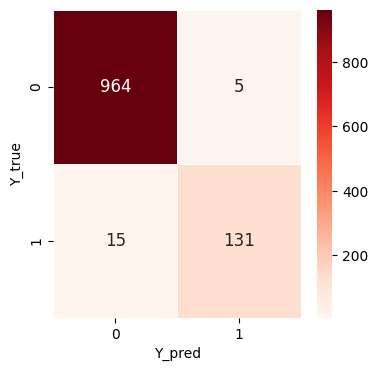

In [42]:
fig, ax = plt.subplots(figsize=(4,4))
sns.heatmap(cm_bnb, cmap="Reds", annot=True, fmt="d", annot_kws={"size": 12}, linewidths=0.5)
plt.xlabel("Y_pred")
plt.ylabel("Y_true")
plt.show()

## Best model to choose is Bernoulli Naive Bayes with the accuracy % 98.21

### Give manual data

In [43]:
mail = "Congratulations! You’ve won a million dollars. Just send us your credit card details to claim your prize." # Spam email example
mail_cleaned = clean_sentence(mail)
mail_cleaned

'congratulations million dollars send us credit card details claim prize'

In [44]:
mail_cleaned_vectorized = vectorizer.transform([mail_cleaned])
mail_cleaned_vectorized

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 8 stored elements and shape (1, 2000)>

In [45]:
y_pred = bernoulliNB.predict(mail_cleaned_vectorized)
y_pred

array([1])

In [46]:
if y_pred[0] == 1:
    print("This e-mail is a spam.")
else:
    print("This e-mail is not a spam.")

This e-mail is a spam.
